In [1]:
import matplotlib.pyplot as plt
import numpy as np

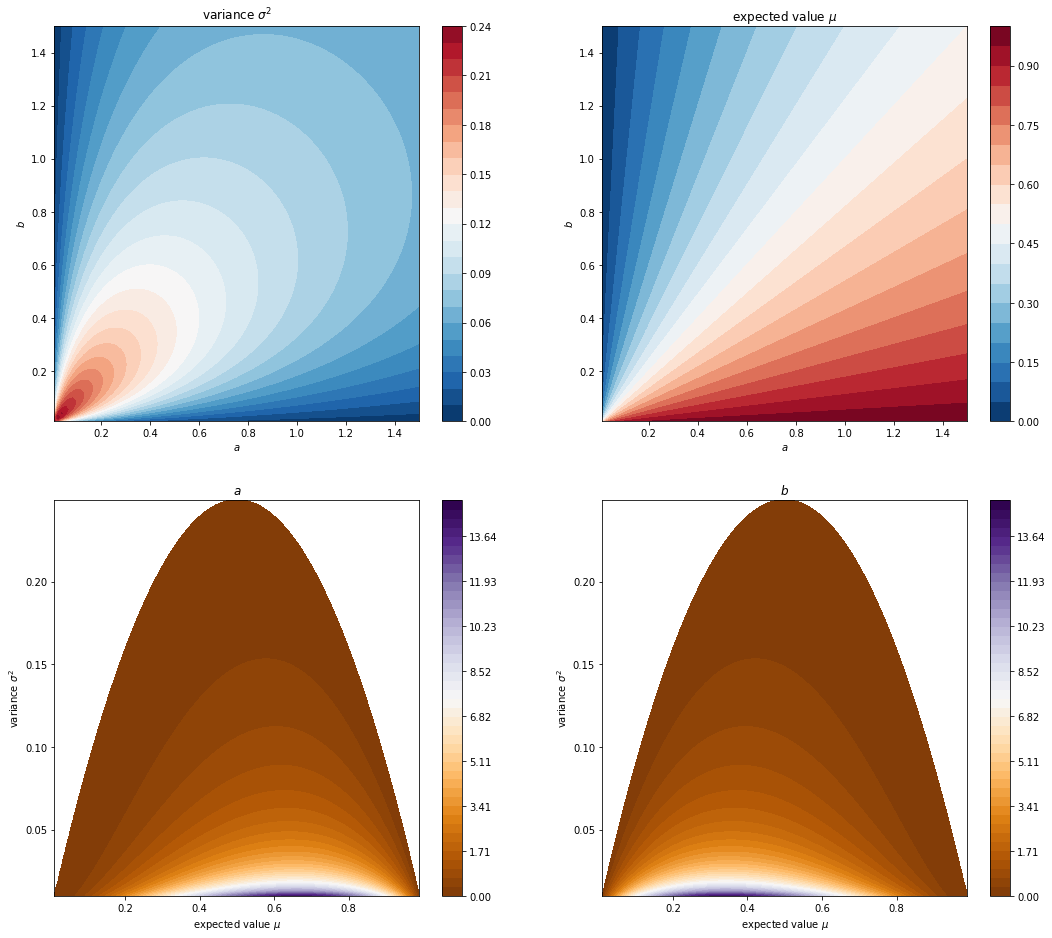

In [3]:
a_min, a_max = 0.01, 1.5
b_min, b_max = 0.01, 1.5
mu_min, mu_max = 0.01, 0.99
var_min, var_max = 0.01, 0.249
 
a_range = np.linspace(a_min, a_max, 100)
b_range = np.linspace(b_min, b_max, 100)
mu_range = np.linspace(mu_min, mu_max, 100)
var_range = np.linspace(var_min, var_max, 100)

def var_func(a, b):
    """Standard deviation of beta distribution"""
    return (a*b)/(((a+b)**2)*(a+b+1))
def mu_func(a, b):
    """Expected value of beta distribution"""
    return a/(a+b)
def a_func(mu, var):
    """a-parameter of beta distribution recovered from mu and var"""
    return -mu*(var-mu+mu**2)/var
def b_func(mu, var):
    """b-parameter of beta distribution recovered from mu and var"""
    return (mu-1)*(var-mu+mu**2)/var

A, B = np.meshgrid(a_range, b_range)
MU, VAR = np.meshgrid(mu_range, var_range)
a = a_func(MU, VAR)
b = b_func(MU, VAR)
var = var_func(A, B)
mu = mu_func(A, B)

fig, ax = plt.subplots(nrows=2, ncols=2, facecolor='w', figsize=(18, 16))

# std <- (a, b)
cstd = ax[0,0].contourf(
    var, np.arange(0, .25, .01), 
    cmap=plt.cm.RdBu_r, 
    extent=[a_min, a_max, b_min, b_max], 
    vmin=0, vmax=.25)
ax[0,0].set_xlabel(r"$a$")
ax[0,0].set_ylabel(r"$b$")
ax[0,0].set_title("variance " + r"$\sigma^2$")
fig.colorbar(cstd, ax=ax[0,0])

# mu <- (a, b)
cmu = ax[0,1].contourf(
    mu, np.arange(0, 1.05, .05), 
    cmap=plt.cm.RdBu_r, 
    extent=[a_min, a_max, b_min, b_max], 
    vmin=0, vmax=1)
ax[0,1].set_xlabel(r"$a$")
ax[0,1].set_ylabel(r"$b$")
ax[0,1].set_title("expected value " + r"$\mu$")
fig.colorbar(cmu, ax=ax[0,1])

# a <- (mu, var)
ca = ax[1,0].contourf(
    a, np.linspace(0.001, 15, 45),
    cmap=plt.cm.PuOr,
    extent=[mu_min, mu_max, var_min, var_max])
ax[1,0].set_xlabel("expected value " + r"$\mu$")
ax[1,0].set_ylabel("variance " + r"$\sigma^2$")
ax[1,0].set_title(r"$a$")
fig.colorbar(ca, ax=ax[1,0])

# b <- (mu, var)
cb = ax[1,1].contourf(
    b, np.linspace(0.001, 15, 45),
    cmap=plt.cm.PuOr,
    extent=[mu_min, mu_max, var_min, var_max])
ax[1,1].set_xlabel("expected value " + r"$\mu$")
ax[1,1].set_ylabel("variance " + r"$\sigma^2$")
ax[1,1].set_title(r"$b$")
fig.colorbar(ca, ax=ax[1,1])

### Display different probability distributrions

Text(0.5, 0, 'learning rate $\\alpha$')

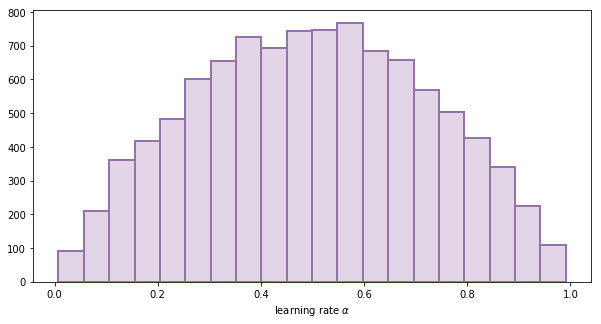

In [4]:
N = 10000
lr = np.random.beta(a=2, b=2, size=N)

fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', figsize=(10, 5))
ax.hist(lr, 20, color="#E1D5E7", linewidth=2, edgecolor='#9673A6');
ax.set_xlabel("learning rate " + r"$\alpha$")

Text(0.5, 0, 'learning rate $\\alpha$')

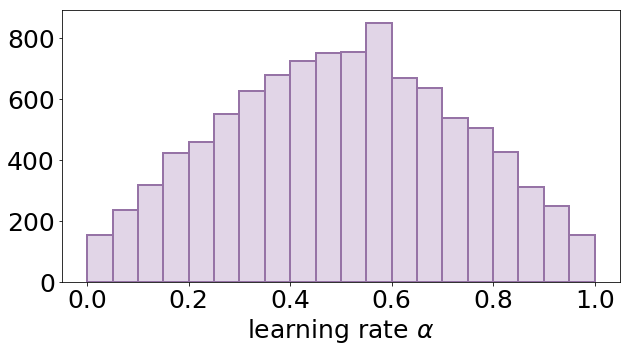

In [10]:
# Test different hyperpriors on a and b
plt.rcParams.update({'font.size': 25})

N = 10000
a = np.random.uniform(1, 10, N)
b = np.random.uniform(1, 10, N)

lr = np.random.beta(a=a, b=b)

fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', figsize=(10, 5))
ax.hist(lr, 20, color="#E1D5E7", linewidth=2, edgecolor='#9673A6');
ax.set_xlabel("learning rate " + r"$\alpha$")

Text(0.5, 0, 'inverse temperature $\\beta$')

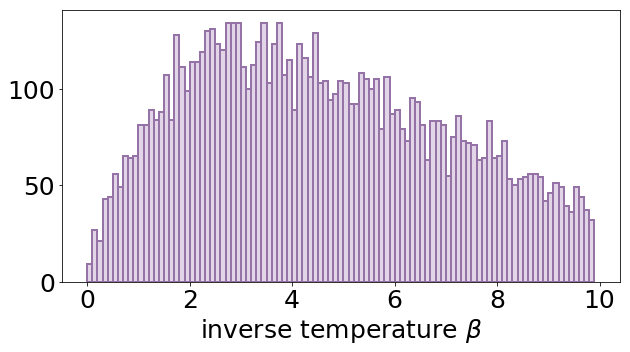

In [9]:
N = 10000
beta = np.random.gamma(shape=2, scale=3, size=N)

fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', figsize=(10, 5))
ax.hist(beta, bins=np.arange(0, 10, .1),
        color="#E1D5E7", linewidth=2, edgecolor='#9673A6');
ax.set_xlabel("inverse temperature " + r"$\beta$")

Text(0.5, 0, 'inverse temperature $\\beta$')

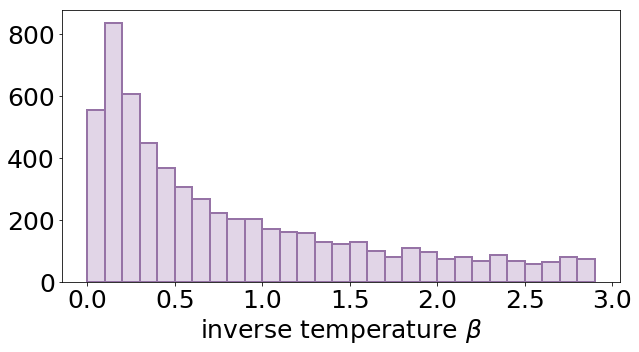

In [5]:
# Test different hyperpriors for softmax temperature
plt.rcParams.update({'font.size': 25})

N = 10000
mu = np.random.uniform(-2.3, 3.4, N)
std = np.random.uniform(0.01, 1.6, N)

beta = np.random.lognormal(mean=mu, sigma=std)

fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', figsize=(10, 5))
ax.hist(beta, bins=np.arange(0, 3, .1),
        color="#E1D5E7", linewidth=2, edgecolor='#9673A6');
ax.set_xlabel("inverse temperature " + r"$\beta$")

Prior for the difference between learning rates for task conditions $\Delta \alpha$ 

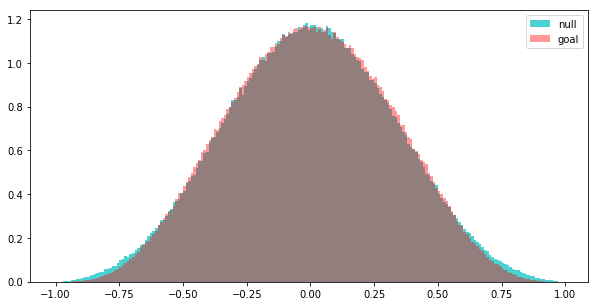

In [57]:
N = 1000000

# LEFT SIDE
a1 = np.random.uniform(1, 10, N)
b1 = np.random.uniform(1, 10, N)
a2 = np.random.uniform(1, 10, N)
b2 = np.random.uniform(1, 10, N)
lr1 = np.random.beta(a=a1, b=b1)
lr2 = np.random.beta(a=a2, b=b2)
diff_true = lr1 - lr2

# RIGHT SIDE
a3 = np.random.uniform(1, 5, N) 
b3 = np.random.uniform(1, 5, N)
diff = np.random.beta(a=4.5, b=4.5, size=N) * 2 - 1

fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', figsize=(10, 5))
ax.hist(diff_true, bins=np.arange(-1, 1, .01), density=True, alpha=.7, color='c', label='null');
ax.hist(diff, bins=np.arange(-1, 1, .01), density=True, alpha=.4, color='r', label='goal');
plt.legend()